# Project: No-Show Appointments Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The no-show appointments dataset is a collection of over 100k medical appointments in Brazil. In this project, I will be analyzing the dataset to see the relationships between multiple independents features and one dependent feature (no show column) in the dataset.

In [1]:
#import packages

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, I loaded the dataset, checked for some attributes  such as shape, missing data, duplicates, datatype of each feature and unique elements in each column.
### General Properties

In [4]:
#load the dataset

def load_data():
    
    df=pd.read_csv('KaggleV2-May-2016.csv')
    
    return df

df=load_data()

> loaded the dataset into dataframe df

In [5]:
#checking for attributes #shape

df.shape 


(110527, 14)

> the  dataframe has 110527 rows and 14 columns

In [6]:
#check for column titles

df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

> returned the column titles. There are typos in the titles and needs to be corrected and formatted.

In [7]:
#checking for missing data

df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> There are no missing data in each of the columns

In [8]:
#checking for duplicates

sum(df.duplicated())

0

> There are no duplicated rows in the dataframe

In [9]:
#checking for datatype of each column

df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

> returned the data type for each column

> The Scheduled Day and Appoinment Day columns are of data type string. It needs to be corrected to datetime type

In [10]:
#checking for number of unique data in each column

df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> returned the number of unique data in each column

> The handcap column returned 5 unique data. From the context of the dataset, The column should be either True (1) or False (0). The data needs to be correct to 0 or 1.

In [11]:
#checking for stats of the columns 

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> Age column has a minimum of -1 which is not possible. The row with the having -1 in the Age column needs to be dropped

## Data Cleaning

In [12]:
#rename the columns titles for my convenience and to correct typos

df.rename(columns={'PatientID':'patient id','AppointmentID':'appointment id','Gender':'gender','ScheduledDay':'scheduled day',
                  
                  'AppointmentDay':'appointment day','Age':'age','Neighbourhood':'neighbourhood','Scholarship':'scholarship',
                  
                  'Hipertension':'hypertension','Diabetes':'diabetes','Alcoholism':'alcholism','Handcap':'handicap',
                   
                   'SMS_received': 'sms received','No-show':'no show'
                  
                  },inplace=True)

df.head()

,PatientId,appointment id,gender,scheduled day,appointment day,age,neighbourhood,scholarship,hypertension,diabetes,alcholism,handicap,sms received,no show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [15]:
#Convert Scheduled Day and Appoinment Day to datetime data type

from datetime import date, time

df['scheduled day']=pd.to_datetime(df['scheduled day']).dt.date


df['appointment day']=pd.to_datetime(df['appointment day']).dt.date

df

,PatientId,appointment id,gender,scheduled day,appointment day,age,neighbourhood,scholarship,hypertension,diabetes,alcholism,handicap,sms received,no show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [16]:
#converted data greater than 1 in the handicap column to 1 to be consistent with 0 (False) and 1 (True)

df['handicap'] = np.where(df['handicap'] > 1, 1, df['handicap'])

df['handicap'].unique()

array([0, 1], dtype=int64)

In [17]:
#drop the row that has -1 as data in the age column and reset index

df.drop(df.loc[df['age']==-1].index, inplace=True)

df.reset_index(drop=True, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis


### Show the distribution of the no show for each age group whether sms was received or not across the gender type in the dataset

In [18]:
#Filter the dataframe by gender into dataframe for male (df_male) and female (df_female)

df_male=df[df['gender']=='M']

df_female=df[df['gender']=='F']

In [19]:
#classify the age elements into age_group and include the age group as a column in both df_male and df_female

age_group_figures=[0,5,13,19,115]

age_group_names=['toddler','kid','teens','adult']

df_male['age group']=pd.cut(df_male['age'], age_group_figures, labels=age_group_names)

df_female['age group']=pd.cut(df_female['age'], age_group_figures, labels=age_group_names, include_lowest=True)

C:\Users\Oladayo\AppData\Local\Temp/ipykernel_6332/332218960.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male['age group']=pd.cut(df_male['age'], age_group_figures, labels=age_group_names)
C:\Users\Oladayo\AppData\Local\Temp/ipykernel_6332/332218960.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['age group']=pd.cut(df_female['age'], age_group_figures, labels=age_group_names, include_lowest=True)


In [20]:
#filter both the df_male and df_female by sms received into new dataframes for both male and female

df_male_sms_adjusted=df_male[df_male['sms received']==0]

df_male_sms_adjusted_2=df_male[df_male['sms received']==1]

df_female_sms_adjusted=df_female[df_female['sms received']==0]

df_female_sms_adjusted_2=df_female[df_female['sms received']==1]


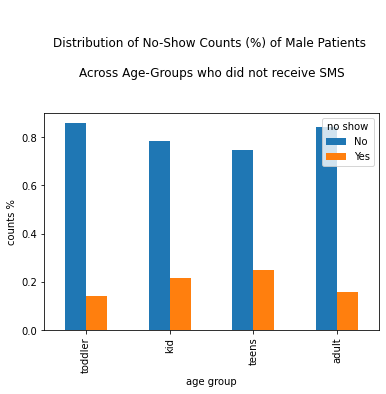

In [21]:
#create new dataframes based on the above 4 dataframes by grouping by 'age group'


#group_1 is a dataframe that shows no-show counts of male patients across age groups who did not receive sms

group_1=df_male_sms_adjusted.groupby('age group')['no show'].value_counts(normalize=True)

group_1.unstack().plot(kind='bar')

plt.title('''

Distribution of No-Show Counts (%) of Male Patients 

Across Age-Groups who did not receive SMS

''')

plt.xlabel('age group')

plt.ylabel('counts %')
 
plt.show()

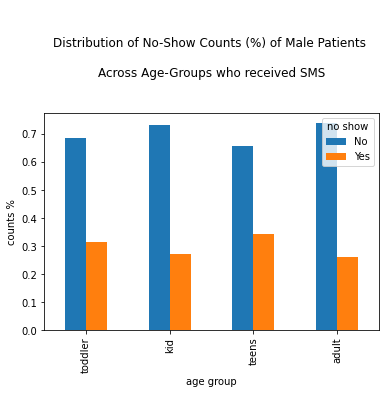

In [22]:
#group_2 is a dataframe that shows no-show counts of male patients across age groups who received sms

group_2=df_male_sms_adjusted_2.groupby('age group')['no show'].value_counts(normalize=True)

group_2.unstack().plot(kind='bar')

plt.title('''

Distribution of No-Show Counts (%) of Male Patients 

Across Age-Groups who received SMS

''')

plt.xlabel('age group')

plt.ylabel('counts %')

plt.show()

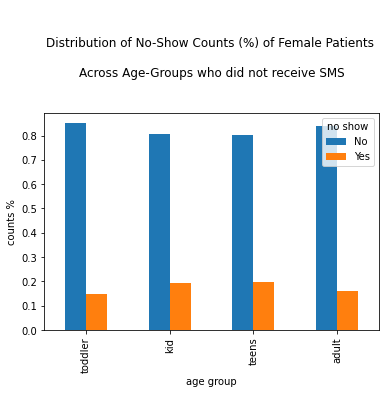

In [23]:
#group_3 is a dataframe that shows no-show counts of female patients across age groups who did not receive sms

group_3=df_female_sms_adjusted.groupby('age group')['no show'].value_counts(normalize=True)

group_3.unstack().plot(kind='bar')

plt.title('''

Distribution of No-Show Counts (%) of Female Patients 

Across Age-Groups who did not receive SMS

''')

plt.xlabel('age group')

plt.ylabel('counts %')
 

plt.show()


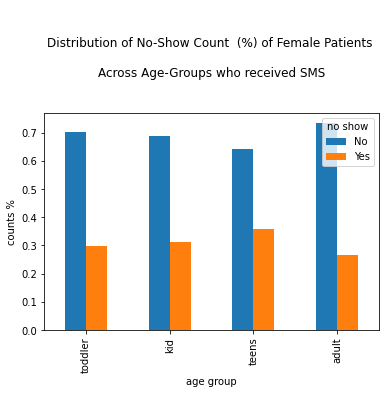

In [24]:
#group_4 is a dataframe that shows no-show counts of female patients across age groups who received sms

group_4=df_female_sms_adjusted_2.groupby('age group')['no show'].value_counts(normalize=True)

group_4.unstack().plot(kind='bar')

plt.title('''

Distribution of No-Show Count  (%) of Female Patients 

Across Age-Groups who received SMS

''')

plt.xlabel('age group')

plt.ylabel('counts %')

plt.show()



> Observation:For both male and female across all age groups, patients who showed up for appointments are higher compared to those who didn't regardless of whether those patients received sms or not.

>### Show Neighbourhoods with the largest no show in appointments and investigate for trends among those neighbourhoods

In [25]:
#filter the dataframe df for when the no-show is Yes to create another dataframe df_x

df_x=df[df['no show']=='Yes']

#carryout a value counts on df_x dataframe grouping by neighbourhood

df_x.groupby('neighbourhood')['no show'].value_counts().sort_values(ascending=False)

neighbourhood                no show
JARDIM CAMBURI               Yes        1465
MARIA ORTIZ                  Yes        1219
ITARARÉ                      Yes         923
RESISTÊNCIA                  Yes         906
CENTRO                       Yes         703
                                        ... 
PONTAL DE CAMBURI            Yes          12
ILHA DO BOI                  Yes           3
ILHAS OCEÂNICAS DE TRINDADE  Yes           2
ILHA DO FRADE                Yes           2
AEROPORTO                    Yes           1
Name: no show, Length: 80, dtype: int64

> The top neighbourhoods that has the largest no show in appointments are JARDIM CAMBURI, MARIA ORTIZ, ITARARÉ, RESISTÊNCIA  and CENTRO

In [26]:
#create a new column called 'time duration' in df_x dataframe. 

#'time duration' is the difference between the appointment day and scheduled day 

df_x['time duration']=df_x['appointment day'] - df_x['scheduled day']

df_x

C:\Users\Oladayo\AppData\Local\Temp/ipykernel_6332/468773366.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['time duration']=df_x['appointment day'] - df_x['scheduled day']


,PatientId,appointment id,gender,scheduled day,appointment day,age,neighbourhood,scholarship,hypertension,diabetes,alcholism,handicap,sms received,no show,time duration
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2 days
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2 days
11,7.542951e+12,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,3 days
17,1.479497e+13,5633460,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes,1 days
20,6.222575e+14,5626083,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110483,5.133650e+14,5772155,F,2016-06-03,2016-06-07,45,BARRO VERMELHO,0,0,0,0,0,0,Yes,4 days
110491,6.456342e+14,5786741,M,2016-06-08,2016-06-08,33,MARIA ORTIZ,0,1,0,0,0,0,Yes,0 days
110495,8.544295e+13,5779046,F,2016-06-06,2016-06-08,37,MARIA ORTIZ,0,1,0,0,0,0,Yes,2 days
110514,6.456342e+14,5778621,M,2016-06-06,2016-06-08,33,MARIA ORTIZ,0,1,0,0,0,0,Yes,2 days


In [27]:
#classify the time duration into time duration group

time_group_figures=pd.to_timedelta(['0 days','30 days','90 days','180 days'])

time_group_names=['1 month','1 month and 3 months','3 months and 6 months']

df_x['time duration group']=pd.cut(df_x['time duration'], time_group_figures, labels=time_group_names, include_lowest=True)

df_x

C:\Users\Oladayo\AppData\Local\Temp/ipykernel_6332/83115978.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['time duration group']=pd.cut(df_x['time duration'], time_group_figures, labels=time_group_names, include_lowest=True)


,PatientId,appointment id,gender,scheduled day,appointment day,age,neighbourhood,scholarship,hypertension,diabetes,alcholism,handicap,sms received,no show,time duration,time duration group
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2 days,1 month
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2 days,1 month
11,7.542951e+12,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,3 days,1 month
17,1.479497e+13,5633460,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes,1 days,1 month
20,6.222575e+14,5626083,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,2 days,1 month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110483,5.133650e+14,5772155,F,2016-06-03,2016-06-07,45,BARRO VERMELHO,0,0,0,0,0,0,Yes,4 days,1 month
110491,6.456342e+14,5786741,M,2016-06-08,2016-06-08,33,MARIA ORTIZ,0,1,0,0,0,0,Yes,0 days,1 month
110495,8.544295e+13,5779046,F,2016-06-06,2016-06-08,37,MARIA ORTIZ,0,1,0,0,0,0,Yes,2 days,1 month
110514,6.456342e+14,5778621,M,2016-06-06,2016-06-08,33,MARIA ORTIZ,0,1,0,0,0,0,Yes,2 days,1 month


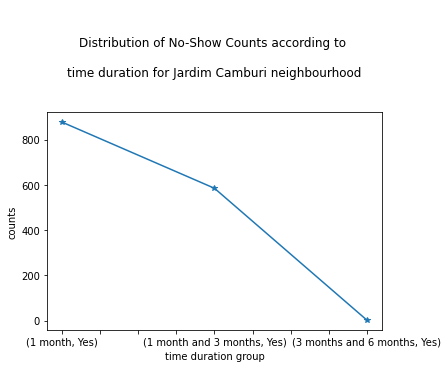

In [42]:
#filter the df_x dataframe by the neighbourhoods with the largest no show appointments.

#Jardim Camburi

df_x_jardim_camburi=df_x[df_x['neighbourhood']=='JARDIM CAMBURI']

#carryout a value count on the no show column grouping by time duration group and then plot a bar chart

df_x_jardim_camburi.groupby('time duration group')['no show'].value_counts().plot(kind='line',marker='*', label='line with marker')

plt.title('''

Distribution of No-Show Counts according to 

time duration for Jardim Camburi neighbourhood

''')

plt.xlabel('time duration group')

plt.ylabel('counts')

plt.show()

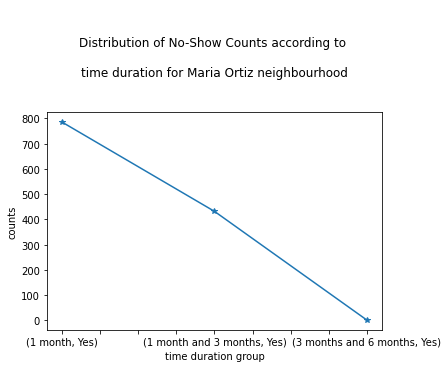

In [41]:
#Maria ortiz

df_x_maria_ortiz=df_x[df_x['neighbourhood']=='MARIA ORTIZ']


df_x_maria_ortiz.groupby('time duration group')['no show'].value_counts().plot(kind='line',marker='*', label='line with marker')

plt.title('''

Distribution of No-Show Counts according to 

time duration for Maria Ortiz neighbourhood

''')

plt.xlabel('time duration group')

plt.ylabel('counts')

plt.show()

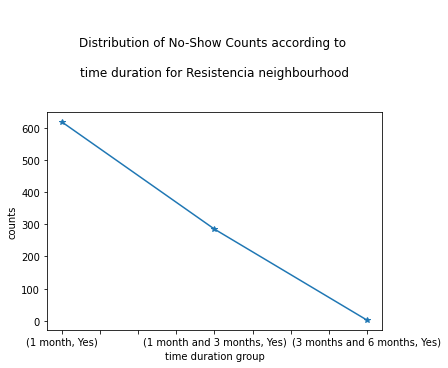

In [40]:
#Resistencia

df_x_resistencia=df_x[df_x['neighbourhood']=='RESISTÊNCIA']


df_x_resistencia.groupby('time duration group')['no show'].value_counts().plot(kind='line',marker='*', label='line with marker')

plt.title('''

Distribution of No-Show Counts according to 

time duration for Resistencia neighbourhood

''')

plt.xlabel('time duration group')

plt.ylabel('counts')

plt.show()

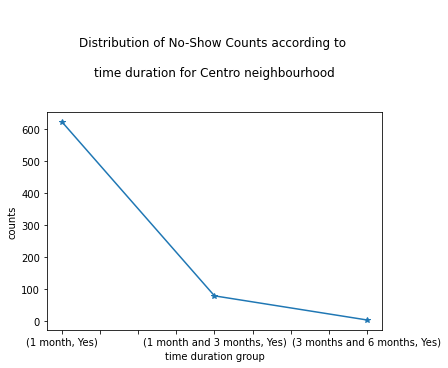

In [39]:
#centro

df_x_centro=df_x[df_x['neighbourhood']=='CENTRO']


df_x_centro.groupby('time duration group')['no show'].value_counts().plot(kind='line', marker='*', label='line with marker')

plt.title('''

Distribution of No-Show Counts according to 

time duration for Centro neighbourhood

''')

plt.xlabel('time duration group')

plt.ylabel('counts')

plt.show()

> Observation: What we see in neighbourhood with the largest no show appointments, the largest of the no show occurs when the time duration between scheduled day and appointment day is between 0-1 month, afterward, the no show counts start to reduce as the time duration increases

<a id='conclusions'></a>
## Conclusions

> The no show appointments dataset was used for this project, after carrying out the wrangling, I sought out to answer 2 questions:

> 1. Check whether patients (for each gender across age groups) receiving sms regarding their appointments have a positive impact on the no show data;

> For both male and female across all age groups, patients who showed up for appointments are higher compared to those who didn't regardless of whether those patients received sms or not.

>2. Check the effect of time duration between scheduled day and appointment day or neighbourdhoods with the largest no show data

> What we see in neighbourhood with the largest no show data, the largest of the no show occurs when the time duration between scheduled day and appointment day is between 0-1 month, afterward, the no show counts start to reduce as the time duration increases

> Additional exploratory analysis can be carried out to investigate and compare the effect of the scholarship ('social welfare') provided for patient appointments down with either 1 of the ailments in the dataset vs those patients appointments  down either 1 of the ailments but were not provided 'social welfare'. Hpow those 2 contributed to the no-show appointments.

> Limitation: because the Patient ID feature (column) consist of duplicates which means some patients have multiple appointments in the dataset, one should be careful to be talking in counts in terms of patient appointments and not patients.